In [1]:
import numpy as np
import G3C_extension as cga
import snake_sim as sim
import matplotlib.pyplot as plt

In [2]:
# same seed for same random configuration
np.random.seed(0)

count = 4
length = 0.5
initial_configuration = sim.configuration_multilink_random_planar(count=count, length=length)
iterations = 300
dt = 0.01
T = np.arange(dt, iterations*dt+dt, dt)
# constant velocity in x
dx = np.ones(iterations)*dt
# cos and shifted sin in y and z
dy = np.cos(12*T)*dt
dz = -np.sin(20*(T+np.pi/3.))*dt
configurations = sim.calculate_kinematics(initial_configuration, dx, dy, dz, iterations)

([<matplotlib.lines.Line2D at 0x200a9ba5400>],
 <matplotlib.legend.Legend at 0x200a9b9df10>)

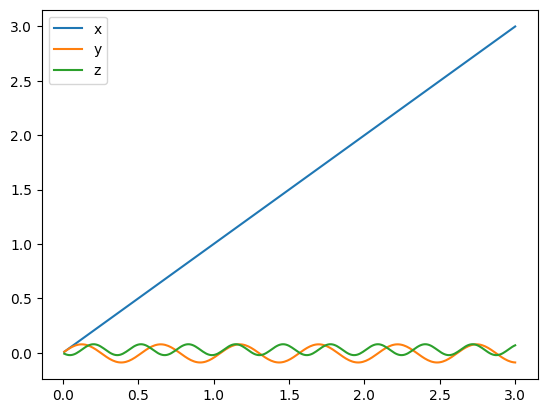

In [3]:
plt.plot(T, np.cumsum(dx)), plt.plot(T, np.cumsum(dy)), plt.plot(T, np.cumsum(dz)), plt.legend(["x", "y", "z"])

In [4]:
x_pts = np.zeros([len(configurations), 5])
y_pts = np.zeros([len(configurations), 5])
z_pts = np.zeros([len(configurations), 5])
for i, config in enumerate(configurations):
    points = cga.extract_unique_points(config)
    x, y, z = cga.extract_points_for_scatter(points)
    x_pts[i] = x
    y_pts[i] = y
    z_pts[i] = z

In [5]:
T = np.insert(T, 0, 0)

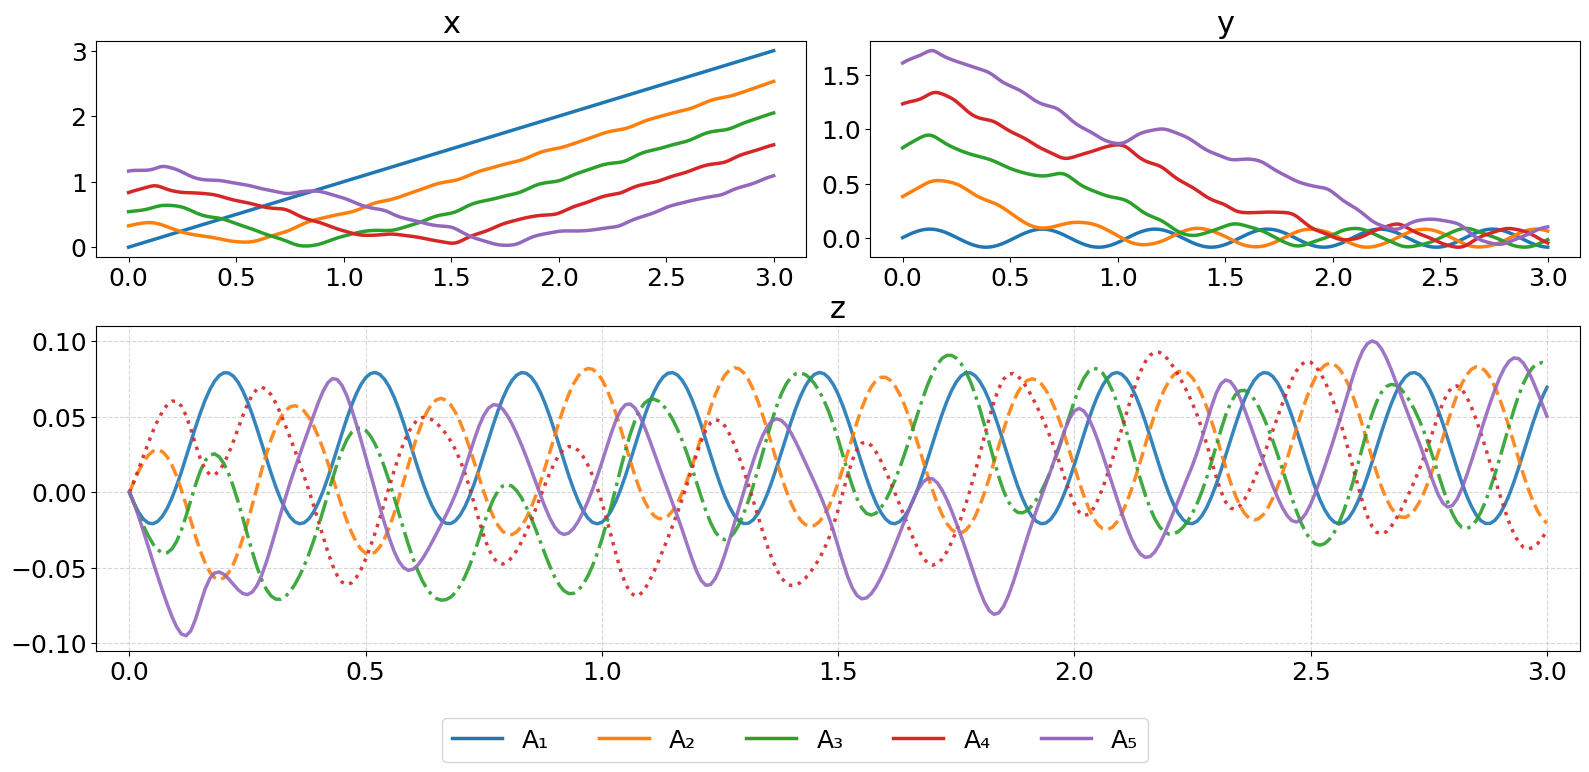

In [6]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

subscripts = ['₁', '₂', '₃', '₄', '₅']
labels = [f"A{sub}" for sub in subscripts]

fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1.5])
linestyles = ['-', '--', '-.', ':', '-']

linewidth = 2.5  # keep default or slightly thicker, but not increased much
title_fontsize = 22  # bigger titles
label_fontsize = 18  # for tick labels and axis labels if needed
legend_fontsize = 18  # bigger legend text

# Collect handles for shared legend
lines = []
default_style = '-'
second_style = '-'

# x plot (top-left)
ax0 = fig.add_subplot(gs[0, 0])
for i in range(5):
    style = default_style if i == 0 else second_style
    line, = ax0.plot(T, x_pts[:, i], linestyle=style, linewidth=linewidth)
    if len(lines) < 5:
        lines.append(line)
ax0.set_title("x", fontsize=title_fontsize)
ax0.tick_params(axis='both', labelsize=label_fontsize)

# y plot (top-right)
ax1 = fig.add_subplot(gs[0, 1])
for i in range(5):
    style = default_style if i == 0 else second_style
    ax1.plot(T, y_pts[:, i], linestyle=style, linewidth=linewidth)
ax1.set_title("y", fontsize=title_fontsize)
ax1.tick_params(axis='both', labelsize=label_fontsize)

# z plot (bottom, spanning both columns)
ax2 = fig.add_subplot(gs[1, :])
for i in range(5):
    style = default_style if i == 0 else second_style
    ax2.plot(T, z_pts[:, i], linestyle=linestyles[i], alpha=0.9, linewidth=linewidth)
ax2.set_title("z", fontsize=title_fontsize)
ax2.tick_params(axis='both', labelsize=label_fontsize)
ax2.grid(True, linestyle='--', alpha=0.5)

margin = 0.07
ax2.set_xlim(0 - margin, T[-1] + margin)

# Shared legend below all plots
fig.legend(lines, labels, loc='lower center', ncol=5, bbox_to_anchor=(0.5, 0.025), fontsize=legend_fontsize)

plt.tight_layout()
plt.subplots_adjust(bottom=0.18)  # more bottom space for legend
# plt.savefig('coordinates.pdf', format='pdf', bbox_inches='tight')
plt.show()


In [7]:
sim.visualise_simulation_animation(configurations).show()

In [8]:
fig = sim.visualise_simulation_start_to_finish(configurations)
fig.update_layout(
    scene=dict(
        xaxis=dict(range=[-1, 4], dtick=1),
        yaxis=dict(range=[-2, 2], dtick=1),
        zaxis=dict(range=[-2, 2], dtick=1),
        aspectmode="manual",
        aspectratio=dict(x=1, y=1, z=1),
    ),
    scene_camera=dict(
        eye=dict(x=1.75, y=1.65, z=0.5) 
    )
)
fig.show()
# fig.write_image('start_finish.pdf')

In [9]:
sim.visualise_simulation_animation_traces(configurations, ghost_count=4, delay=20, frame_duration=20)

In [10]:
# for i in range(10):
i=5
sim.visualise_simulation_evolution(
    configurations[5*i:5*(i+4):2],
    count,
    range_x=(-0.1, 1.5),
    range_y=(-0.1, 1.5),
    range_z=(-0.1, 1.5),
    # color_disc_map=lambda val: f"rgba({255*val}, 0, {255*(1.-val)}, {(np.sin(np.abs(val*np.pi - np.pi/2))**3 + 0.3)/1.5 })", #val*0.7+0.3
    color_disc_map=lambda val: f"rgba({255*val}, 0, {255*(1.-val)}, {np.piecewise(val, [val == 0. or val == 1., val != 0 and val != 1], [1, 0.4])})"
)

In [11]:
# view 1

i=9
angle = np.pi*2.05/3.
radius = 0.75
eye_x = radius * np.cos(angle) + 0.7
eye_y = radius * np.sin(angle)
fig1 = sim.visualise_simulation_evolution(
        configurations[5 * i : 5 * (i + 4) : 3],
        count,
        range_x=(-0.2, 2),
        range_y=(-0.2, 2),
        range_z=(-0.2, 2),
        # color_disc_map=lambda val: f"rgba({255*val}, 0, {255*(1.-val)}, {(np.sin(np.abs(val*np.pi - np.pi/2))**3 + 0.3)/1.5 })", #val*0.7+0.3
        color_disc_map=lambda val: f"rgba({255*val}, 0, {255*(1.-val)}, {np.piecewise(val, [val == 0. or val == 1., val != 0 and val != 1], [1, 0.3])})",
        show_legend=False,
    ).update_layout(
        scene=dict(
            xaxis=dict(range=[-2, 2], dtick=1),
            yaxis=dict(range=[-2, 2], dtick=1),
            zaxis=dict(range=[-2, 2], dtick=1),
            aspectmode="manual",
            aspectratio=dict(x=1, y=1, z=1),
        ),
        scene_camera=dict(eye=dict(x=eye_x, y=eye_y, z=0.1)))
fig1.show()
# fig1.write_image('plot1.pdf')

In [12]:
# view 2
fig2 = sim.visualise_simulation_evolution(
        configurations[5 * i : 5 * (i + 4) : 3],
        count,
        range_x=(-0.2, 2),
        range_y=(-0.2, 2),
        range_z=(-0.2, 2),
        # color_disc_map=lambda val: f"rgba({255*val}, 0, {255*(1.-val)}, {(np.sin(np.abs(val*np.pi - np.pi/2))**3 + 0.3)/1.5 })", #val*0.7+0.3
        color_disc_map=lambda val: f"rgba({255*val}, 0, {255*(1.-val)}, {np.piecewise(val, [val == 0. or val == 1., val != 0 and val != 1], [1, 0.3])})",
        show_legend=False,
    ).update_layout(
        scene=dict(
            xaxis=dict(range=[-2, 2], dtick=1),
            yaxis=dict(range=[-2, 2], dtick=1),
            zaxis=dict(range=[-2, 2], dtick=1),
            aspectmode="manual",
            aspectratio=dict(x=1, y=1, z=1),
        ),
        scene_camera=dict(eye=dict(x=0.35, y=0.75, z=0.55)))
fig2.show()
# fig2.write_image('plot2.pdf')